In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
%matplotlib inline
import sklearn
from sklearn import model_selection

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

n = 5000

x_train = x_train[:n]
y_train = y_train[:n]

x_train_split, x_val_split, y_train_split, y_val_split = sklearn.model_selection.train_test_split(x_train, y_train, test_size = 0.2)

x_train_split = x_train_split / 255
x_test = x_test /  255
x_val_split = x_val_split / 255


In [ ]:
y_train_split_cat = keras.utils.to_categorical(y_train_split, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

y_val_split_cat = keras.utils.to_categorical(y_val_split, 10)

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(250, activation='relu'),
    Dropout(0.8),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 250)               196250    
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 250)               1000      
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 10)                2510      
                                                                 
Total params: 199760 (780.31 KB)
Trainable params: 199260 (778.36 KB)
Non-trainable params: 500 (1.95 KB)
______________

In [ ]:
my_optimizer = keras.optimizers.Adam(learning_rate = 0.1)
my_optimizer_2 = keras.optimizers.SGD(learning_rate = 0.1, nesterov=True, momentum=0.0)
model.compile(optimizer=my_optimizer_2, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_split, y_train_split_cat, validation_data= (x_val_split, y_val_split_cat) , batch_size=32, epochs=30, verbose=False)
# можно написать validation_data = .., train_data = ...

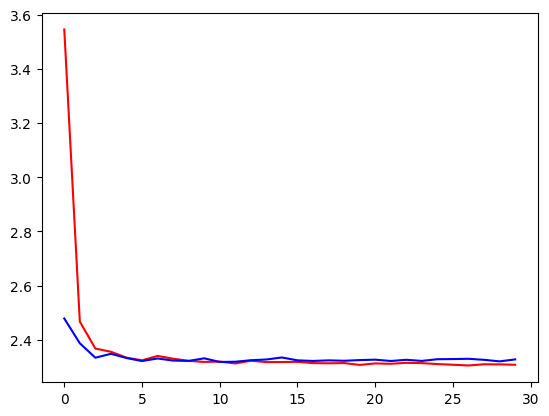

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, color=(1,0,0))
plt.plot(val_loss, color=(0,0,1))
plt.show()

In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 2.3006 - accuracy: 0.0593


[2.3006041049957275, 0.059300001710653305]

validation split разделение обуччающей выборки на обучающую и валидирующую


In [ ]:
n = 140
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f'number: {np.argmax(res)}')
#plt.imshow(x_test[n], cmap=plt.cm.binary)
#plt.show()

1/1 [==============================] - 0s 68ms/step
[[0.10413766 0.08956584 0.09585977 0.12392872 0.08984059 0.10161745
  0.10645258 0.10430412 0.0927799  0.0915134 ]]
number: 3


In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

l = 100
r = 110

print(pred[l:r])
print(y_test[l:r])


313/313 [==============================] - 1s 2ms/step
(10000,)
[6 1 3 9 3 3 3 5 3 3]
[6 0 5 4 9 9 2 1 9 4]


In [ ]:
mask = pred == y_test

print(mask[:5])

mask = ~mask

x_false = x_test[mask]
p_false = pred[mask]
y_false = y_test[mask]

print(x_false.shape)

print(mask[mask==False].shape[0]/mask.shape[0])



[False False False False False]
(9407, 28, 28)
0.0593


Result: 1
Correct: 7


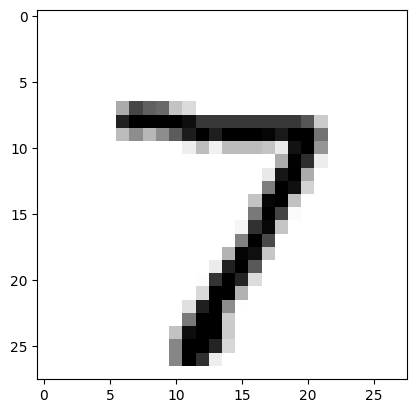

In [ ]:
num_false = 1

for i in range(num_false):
  print(f'Result: {p_false[i]}')
  print(f'Correct: {y_false[i]}')
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()